In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 
loan_data = pd.read_csv(r'C:\Users\dhruv\Downloads\LoanDataset - LoansDatasest.csv')

loan_data.head()


,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


# Cleaning Data

In [6]:
loan_data['loan_amnt'] = loan_data['loan_amnt'].replace({'£': '', ',': ''}, regex=True).astype(float)

loan_data['loan_int_rate'] = loan_data['loan_int_rate'].replace({'%': ''}, regex=True).astype(float)

loan_data['historical_default'].fillna('N', inplace=True)

loan_data['home_ownership'] = loan_data['home_ownership'].map({'RENT': 0, 'OWN': 1, 'MORTGAGE': 2})
loan_data['loan_intent'] = loan_data['loan_intent'].astype('category').cat.codes
loan_data['Current_loan_status'] = loan_data['Current_loan_status'].map({'NO DEFAULT': 0, 'DEFAULT': 1})

missing_values = loan_data.isnull().sum()
print("Missing values:\n", missing_values)

loan_data.head()


Missing values:
 customer_id               3
customer_age              0
customer_income           0
home_ownership          107
employment_duration     895
loan_intent               0
loan_grade                0
loan_amnt                 1
loan_int_rate          3116
term_years                0
historical_default        0
cred_hist_length          0
Current_loan_status       4
dtype: int64


,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,0.0,123.0,4,C,35000.0,16.02,10,Y,3,1.0
1,2.0,21,9600,1.0,5.0,1,A,1000.0,11.14,1,N,2,0.0
2,3.0,25,9600,2.0,1.0,3,B,5500.0,12.87,5,N,3,1.0
3,4.0,23,65500,0.0,4.0,3,B,35000.0,15.23,10,N,2,1.0
4,5.0,24,54400,0.0,8.0,3,B,35000.0,14.27,10,Y,4,1.0


# EDA

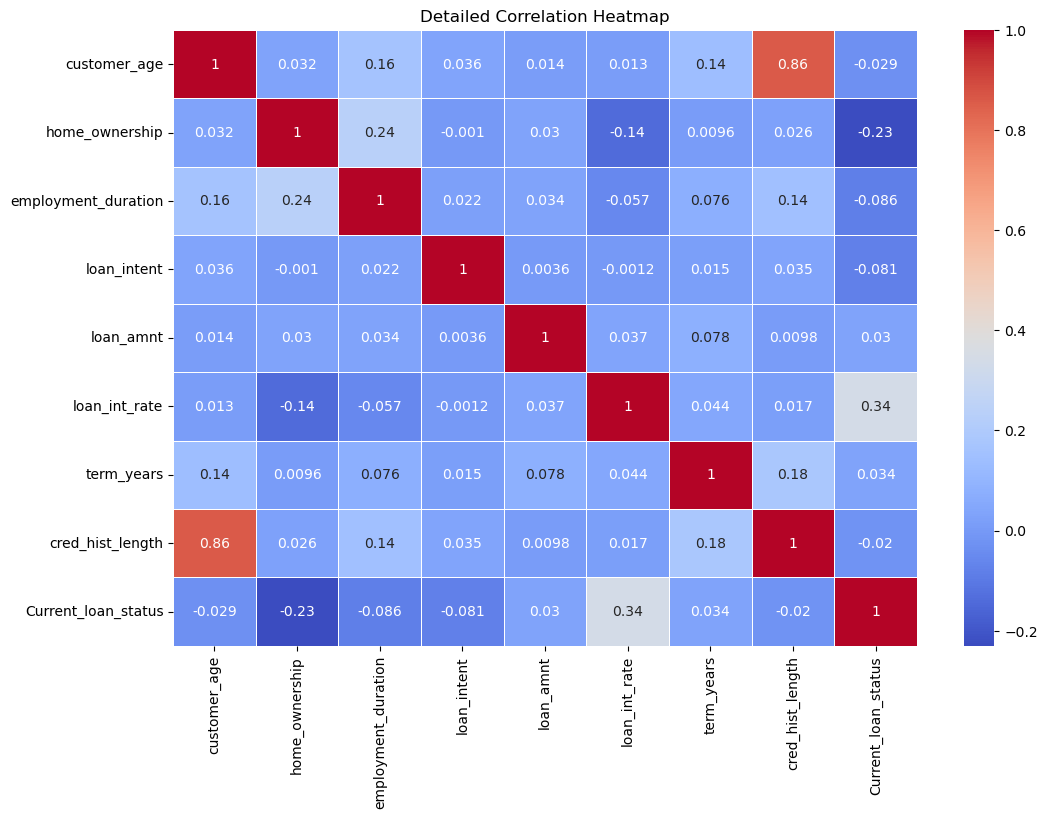

In [7]:
# Remove customer_id column for correlation analysis as it is not relevant
loan_data_cleaned = loan_data.drop(columns=['customer_id'])

# Compute the correlation matrix
correlation_matrix = loan_data_cleaned.corr(numeric_only=True)

# Plotting a more detailed correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Detailed Correlation Heatmap')
plt.show()



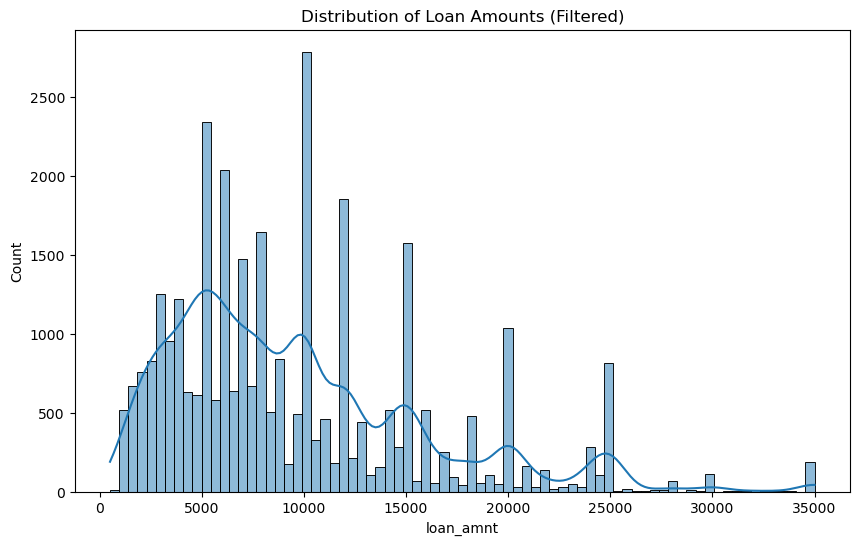

In [8]:
# Filtering the loan amounts to exclude extreme outliers for better visualization
filtered_loan_data = loan_data_cleaned[loan_data_cleaned['loan_amnt'] < 100000] 

# Plotting the distribution of loan amounts without extreme outliers
plt.figure(figsize=(10, 6))
sns.histplot(filtered_loan_data['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts (Filtered)')
plt.show()


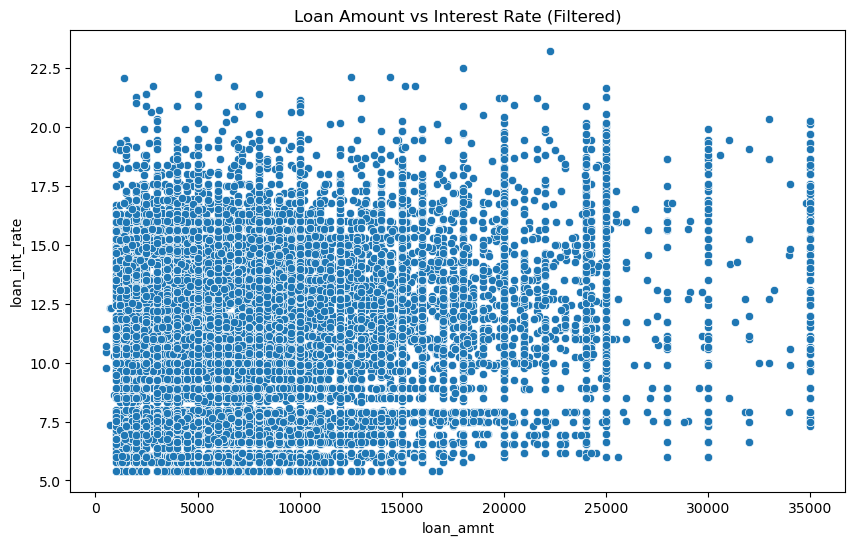

In [9]:
# Scatter plot between loan amount and interest rate with filtered loan amounts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='loan_int_rate', data=filtered_loan_data)
plt.title('Loan Amount vs Interest Rate (Filtered)')
plt.show()


C:\Users\dhruv\AppData\Local\Temp\ipykernel_28348\284934212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data['employment_duration'].fillna(filtered_loan_data['employment_duration'].median(), inplace=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_28348\284934212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data['employment_duration_years'] = (filtered_loan_data['employment_duration'] / 12).round().astype(int)


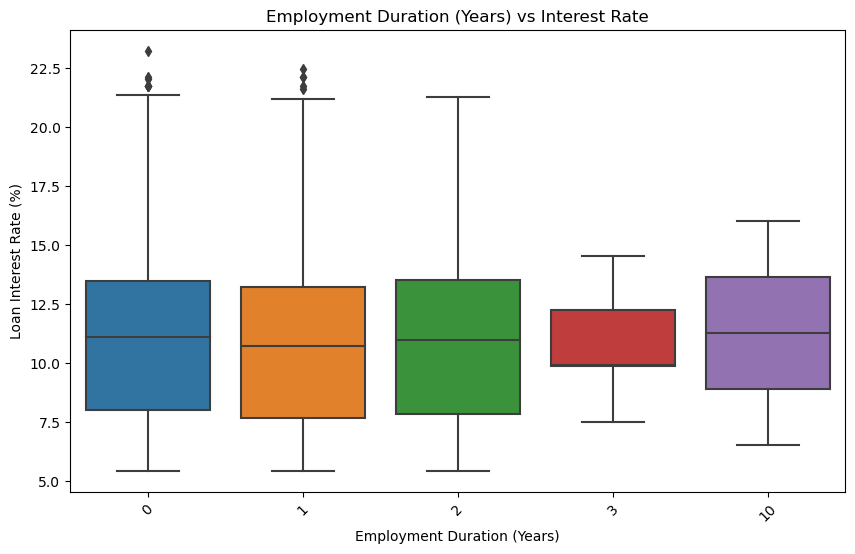

In [10]:
# Fill missing values in employment_duration with the median
filtered_loan_data['employment_duration'].fillna(filtered_loan_data['employment_duration'].median(), inplace=True)

# Convert employment_duration from months to years and round to nearest integer
filtered_loan_data['employment_duration_years'] = (filtered_loan_data['employment_duration'] / 12).round().astype(int)

# Plot the boxplot for Employment Duration (Years) vs Interest Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_duration_years', y='loan_int_rate', data=filtered_loan_data)
plt.title('Employment Duration (Years) vs Interest Rate')

# Adjust x-tick labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Employment Duration (Years)')
plt.ylabel('Loan Interest Rate (%)')

plt.show()


# Does High Income means low interest rate ? 

C:\Users\dhruv\AppData\Local\Temp\ipykernel_28348\507917470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data['customer_income'] = filtered_loan_data['customer_income'].replace({'£': '', ',': ''}, regex=True).astype(float)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_28348\507917470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data['income_group'] = pd.qcut(filtered_loan_data['customer_income'],


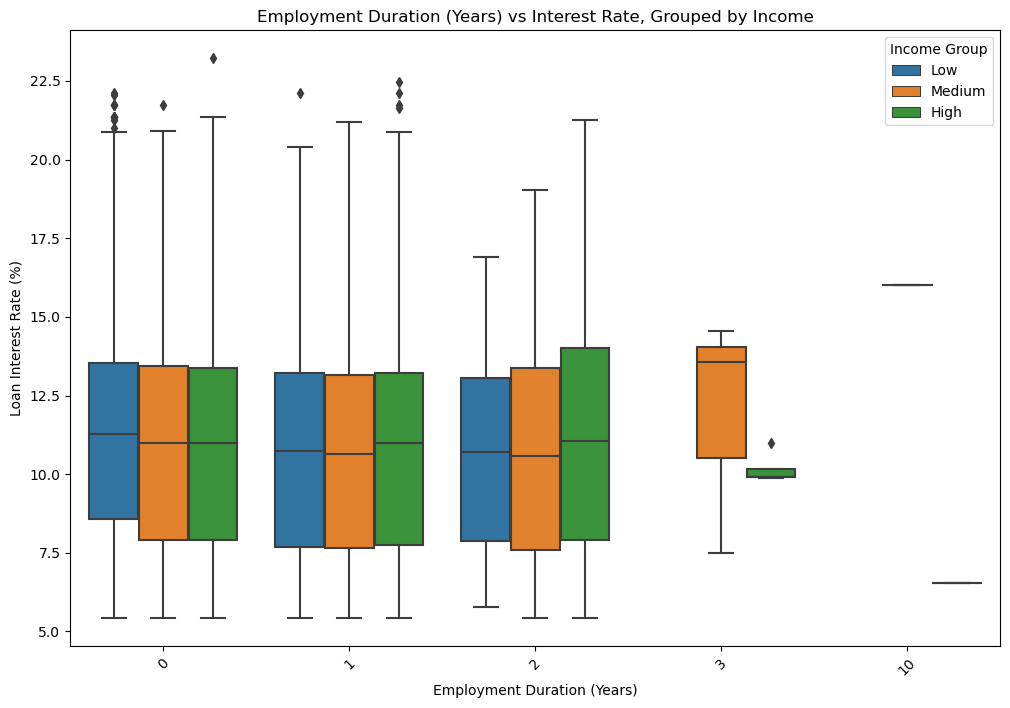

In [11]:

filtered_loan_data['customer_income'] = filtered_loan_data['customer_income'].replace({'£': '', ',': ''}, regex=True).astype(float)

#create income groups (low, medium, high) based on quantiles
filtered_loan_data['income_group'] = pd.qcut(filtered_loan_data['customer_income'], 
                                             q=3, labels=['Low', 'Medium', 'High'])

# Employment Duration vs Interest Rate, separated by Income Groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='employment_duration_years', y='loan_int_rate', hue='income_group', data=filtered_loan_data)
plt.title('Employment Duration (Years) vs Interest Rate, Grouped by Income')
plt.xlabel('Employment Duration (Years)')
plt.ylabel('Loan Interest Rate (%)')

plt.legend(title='Income Group')
plt.xticks(rotation=45)
plt.show()


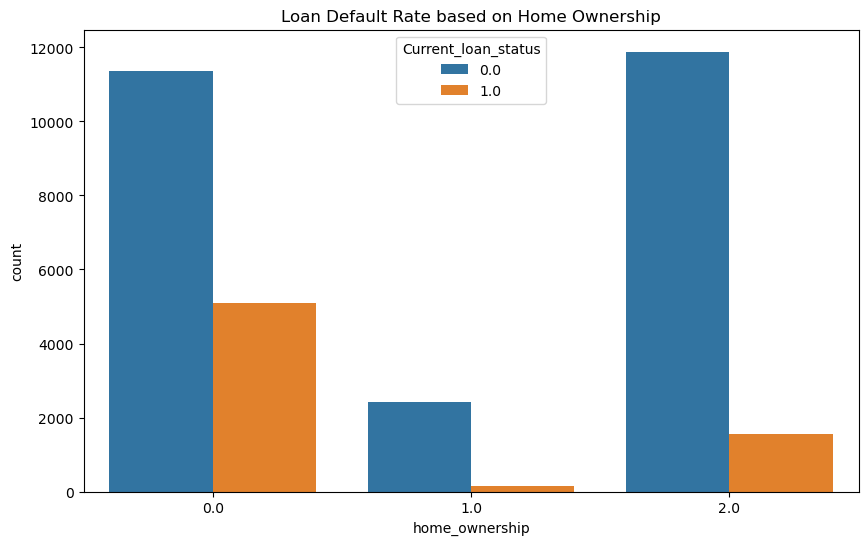

In [12]:
# Default rate based on home ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='Current_loan_status', data=filtered_loan_data)
plt.title('Loan Default Rate based on Home Ownership')
plt.show()


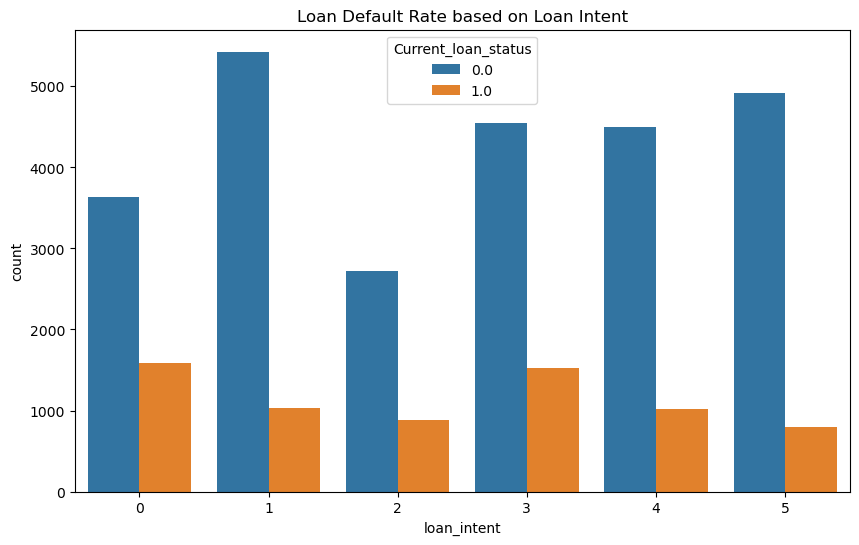

In [13]:
# Default rate based on loan intent
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_intent', hue='Current_loan_status', data=filtered_loan_data)
plt.title('Loan Default Rate based on Loan Intent')
plt.show()


# Feature engineering

## Income to Loan ratio 

In [14]:
#Loan-to-Income ratio
filtered_loan_data['loan_to_income_ratio'] = filtered_loan_data['loan_amnt'] / filtered_loan_data['customer_income']
filtered_loan_data[['loan_amnt', 'customer_income', 'loan_to_income_ratio']].head()


C:\Users\dhruv\AppData\Local\Temp\ipykernel_28348\2596800577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data['loan_to_income_ratio'] = filtered_loan_data['loan_amnt'] / filtered_loan_data['customer_income']


,loan_amnt,customer_income,loan_to_income_ratio
0,35000.0,59000.0,0.593220
1,1000.0,9600.0,0.104167
2,5500.0,9600.0,0.572917
3,35000.0,65500.0,0.534351
4,35000.0,54400.0,0.643382


## Binning to Capture Non Linear Relationship 

In [15]:

filtered_loan_data['age_group'] = pd.cut(filtered_loan_data['customer_age'], 
                                         bins=[18, 30, 50, 80], 
                                         labels=['Young', 'Middle-Aged', 'Senior'])

# Inspect binned age group
filtered_loan_data[['customer_age', 'age_group']].head()


C:\Users\dhruv\AppData\Local\Temp\ipykernel_28348\1873960488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data['age_group'] = pd.cut(filtered_loan_data['customer_age'],


,customer_age,age_group
0,22,Young
1,21,Young
2,25,Young
3,23,Young
4,24,Young


# Binning Loan Amount & Rate

In [16]:
# Binning loan_amnt into categories
filtered_loan_data['loan_amnt_group'] = pd.cut(filtered_loan_data['loan_amnt'], 
                                               bins=[0, 5000, 20000, 100000], 
                                               labels=['Low', 'Medium', 'High'])

filtered_loan_data[['loan_amnt', 'loan_amnt_group']].head()

# Binning loan_int_rate into categories
filtered_loan_data['int_rate_group'] = pd.cut(filtered_loan_data['loan_int_rate'], 
                                              bins=[0, 10, 15, 25], 
                                              labels=['Low', 'Medium', 'High'])

filtered_loan_data[['loan_int_rate', 'int_rate_group']].head()


C:\Users\dhruv\AppData\Local\Temp\ipykernel_28348\1043549121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data['loan_amnt_group'] = pd.cut(filtered_loan_data['loan_amnt'],
C:\Users\dhruv\AppData\Local\Temp\ipykernel_28348\1043549121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data['int_rate_group'] = pd.cut(filtered_loan_data['loan_int_rate'],


,loan_int_rate,int_rate_group
0,16.02,High
1,11.14,Medium
2,12.87,Medium
3,15.23,High
4,14.27,Medium


In [17]:

# Interaction between loan_intent and credit history length
filtered_loan_data['loan_intent_credit_history_interaction'] = filtered_loan_data['loan_intent'].astype(str) + '_' + filtered_loan_data['cred_hist_length'].astype(str)

filtered_loan_data.head()


C:\Users\dhruv\AppData\Local\Temp\ipykernel_28348\133402915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data['loan_intent_credit_history_interaction'] = filtered_loan_data['loan_intent'].astype(str) + '_' + filtered_loan_data['cred_hist_length'].astype(str)


,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,employment_duration_years,income_group,loan_to_income_ratio,age_group,loan_amnt_group,int_rate_group,loan_intent_credit_history_interaction
0,22,59000.0,0.0,123.0,4,C,35000.0,16.02,10,Y,3,1.0,10,Medium,0.593220,Young,High,High,4_3
1,21,9600.0,1.0,5.0,1,A,1000.0,11.14,1,N,2,0.0,0,Low,0.104167,Young,Low,Medium,1_2
2,25,9600.0,2.0,1.0,3,B,5500.0,12.87,5,N,3,1.0,0,Low,0.572917,Young,Medium,Medium,3_3
3,23,65500.0,0.0,4.0,3,B,35000.0,15.23,10,N,2,1.0,0,Medium,0.534351,Young,High,High,3_2
4,24,54400.0,0.0,8.0,3,B,35000.0,14.27,10,Y,4,1.0,1,Medium,0.643382,Young,High,Medium,3_4


In [18]:

filtered_loan_data.head()


,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,employment_duration_years,income_group,loan_to_income_ratio,age_group,loan_amnt_group,int_rate_group,loan_intent_credit_history_interaction
0,22,59000.0,0.0,123.0,4,C,35000.0,16.02,10,Y,3,1.0,10,Medium,0.593220,Young,High,High,4_3
1,21,9600.0,1.0,5.0,1,A,1000.0,11.14,1,N,2,0.0,0,Low,0.104167,Young,Low,Medium,1_2
2,25,9600.0,2.0,1.0,3,B,5500.0,12.87,5,N,3,1.0,0,Low,0.572917,Young,Medium,Medium,3_3
3,23,65500.0,0.0,4.0,3,B,35000.0,15.23,10,N,2,1.0,0,Medium,0.534351,Young,High,High,3_2
4,24,54400.0,0.0,8.0,3,B,35000.0,14.27,10,Y,4,1.0,1,Medium,0.643382,Young,High,Medium,3_4


# Traning Model, Random Forest K folds 

Average Cross-Validation Score: 0.9262
Standard Deviation of Cross-Validation Scores: 0.0036
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5149
         1.0       0.93      0.67      0.78      1367

    accuracy                           0.92      6516
   macro avg       0.92      0.83      0.87      6516
weighted avg       0.92      0.92      0.92      6516



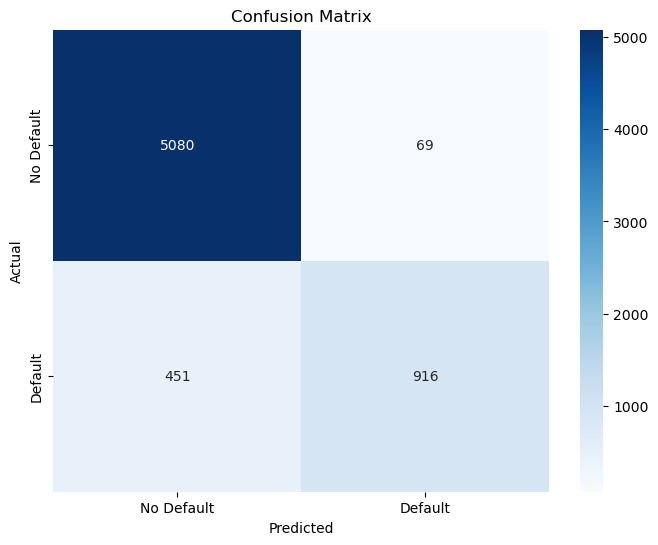

Accuracy: 0.9202
ROC-AUC Score: 0.9242


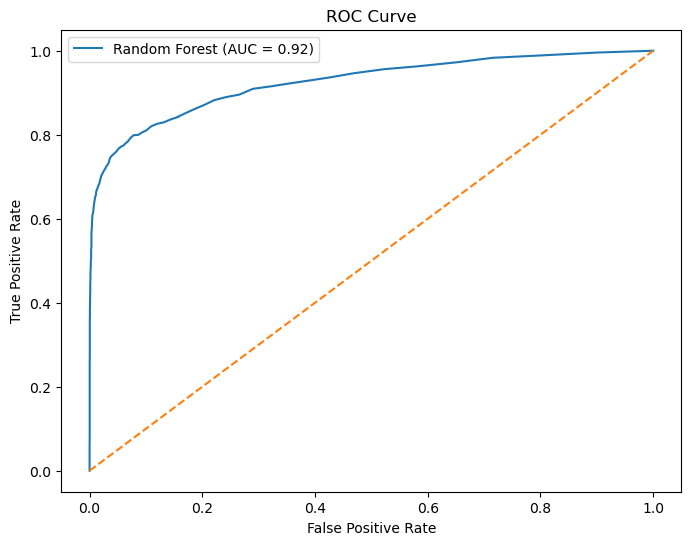

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare
filtered_loan_data = filtered_loan_data.dropna(subset=['Current_loan_status'])

X = filtered_loan_data.drop(columns=['Current_loan_status'])  # Features
y = filtered_loan_data['Current_loan_status']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode and map
categorical_columns = ['income_group', 'age_group', 'loan_amnt_group', 'int_rate_group']
loan_grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}

# Encoding categorical columns
for column in categorical_columns:
    if column in X_train.columns:
        X_train[column] = X_train[column].astype('category').cat.codes


X_train['loan_grade'] = X_train['loan_grade'].map(loan_grade_mapping).astype(float)
X_train['historical_default'] = X_train['historical_default'].map({'Y': 1, 'N': 0})
X_train['loan_intent_credit_history_interaction'] = X_train['loan_intent_credit_history_interaction'].astype('category').cat.codes

# Impute missing values with the median
imputer_train = SimpleImputer(strategy='median')
X_train_encoded = imputer_train.fit_transform(X_train)

# Train Random Forest Model with K-Fold Cross-Validation
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
cv_scores = cross_val_score(rf_classifier, X_train_encoded, y_train, cv=5)

print(f'Average Cross-Validation Score: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std():.4f}')

# Fit the Random Forest Model on the Entire Training Set
rf_classifier.fit(X_train_encoded, y_train)


for column in categorical_columns:
    if column in X_test.columns:
        X_test[column] = X_test[column].astype('category').cat.codes


X_test['loan_grade'] = X_test['loan_grade'].map(loan_grade_mapping).astype(float)
X_test['historical_default'] = X_test['historical_default'].map({'Y': 1, 'N': 0})
X_test['loan_intent_credit_history_interaction'] = X_test['loan_intent_credit_history_interaction'].astype('category').cat.codes
X_test_encoded_imputed = imputer_train.transform(X_test)

#  Predict on the Test Set
y_pred = rf_classifier.predict(X_test_encoded_imputed)

#Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Step 9: ROC-AUC Curve
y_pred_proba = rf_classifier.predict_proba(X_test_encoded_imputed)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [20]:
#The Average Cross-Validation Score of 0.9262 (or 92.62%) suggests that the model generalizes well across different 
#folds of the dataset. Cross-validation is a good measure to check how a model performs on unseen data, and this high 
#score indicates the model is consistently performing well.

In [21]:
#Confusion Matrix:

#The confusion matrix shows the breakdown of actual vs. predicted classes:
#5080 true negatives (No Default predicted correctly).
#69 false positives (Predicted Default, but was No Default).
#916 true positives (Default predicted correctly).
#451 false negatives (Predicted No Default, but was actually Default).
#This suggests the model is particularly strong at identifying non-defaulters, but slightly weaker at identifying defaulters.

In [22]:
#The model struggles with recall for defaulters (67%). This means it misses about 33% of actual defaulters., we can Model Tuning:

#Hyperparameter Optimization: Use techniques like GridSearchCV or RandomizedSearchCV to find the best combination of hyperparameters for the RandomForest model, such as number of trees, depth, etc.

# Neural network

In [28]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

Data preprocessing completed successfully.


C:\Users\dhruv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7396 - loss: 0.5678 - val_accuracy: 0.8360 - val_loss: 0.3951
Epoch 2/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8331 - loss: 0.3978 - val_accuracy: 0.8473 - val_loss: 0.3671
Epoch 3/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8420 - loss: 0.3820 - val_accuracy: 0.8529 - val_loss: 0.3520
Epoch 4/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8517 - loss: 0.3602 - val_accuracy: 0.8569 - val_loss: 0.3469
Epoch 5/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8564 - loss: 0.3551 - val_accuracy: 0.8580 - val_loss: 0.3478
Epoch 6/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8669 - loss: 0.3360 - val_accuracy: 0.8630 - val_loss: 0.3359
Epoch 7/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8650 - loss: 0.3378 - val_accuracy: 0.8640 - val_loss: 0.3339
Epoch 8/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8692 - loss: 0.3289 - val_accu

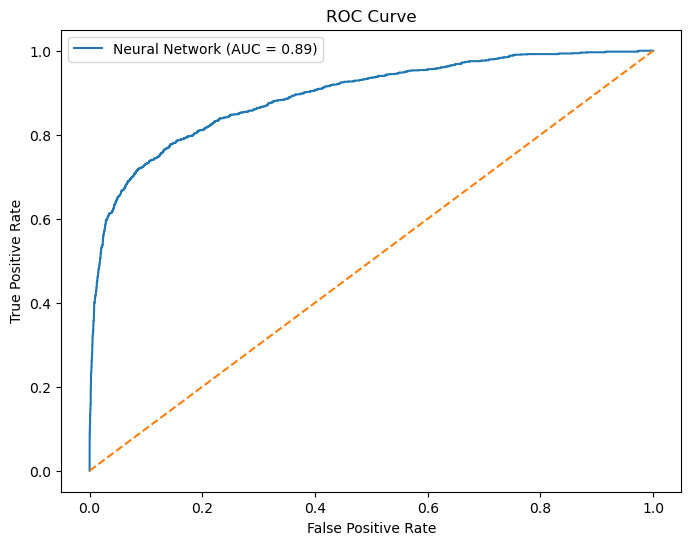

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns


X_combined = pd.concat([X_train, X_test], axis=0)

# Encode categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Use sparse_output instead of sparse
X_combined_encoded = encoder.fit_transform(X_combined[categorical_columns])

# Convert encoded categorical into DataFrame and merge with numerical data
X_combined_encoded_df = pd.DataFrame(X_combined_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_combined = X_combined.drop(columns=categorical_columns).reset_index(drop=True)
X_combined = pd.concat([X_combined, X_combined_encoded_df], axis=1)

X_train = X_combined.iloc[:X_train.shape[0], :]
X_test = X_combined.iloc[X_train.shape[0]:, :]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed successfully.")


# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

#Evaluate
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Print performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate ROC-AUC
y_pred_proba = model.predict(X_test_scaled).ravel()
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Random Forest performed better in terms of both accuracy and ROC-AUC score compared to the neural network model.

In [31]:
# IMprove model 

# Convolutional Neural Networks (CNNs) or Long Short-Term Memory (LSTM)

Epoch 1/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8011 - loss: 0.4702 - val_accuracy: 0.8525 - val_loss: 0.3680
Epoch 2/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8662 - loss: 0.3559 - val_accuracy: 0.8686 - val_loss: 0.3372
Epoch 3/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8704 - loss: 0.3366 - val_accuracy: 0.8728 - val_loss: 0.3299
Epoch 4/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8824 - loss: 0.3196 - val_accuracy: 0.8820 - val_loss: 0.3135
Epoch 5/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8902 - loss: 0.3103 - val_accuracy: 0.8868 - val_loss: 0.3031
Epoch 6/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8919 - loss: 0.3036 - val_accuracy: 0.8895 - val_loss: 0.3032
Epoch 7/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8971 - loss: 0.2935 - val_accuracy: 0.8916 - val_loss: 0.2965
Epoch 8/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9018 - loss: 0.2837 - val_ac

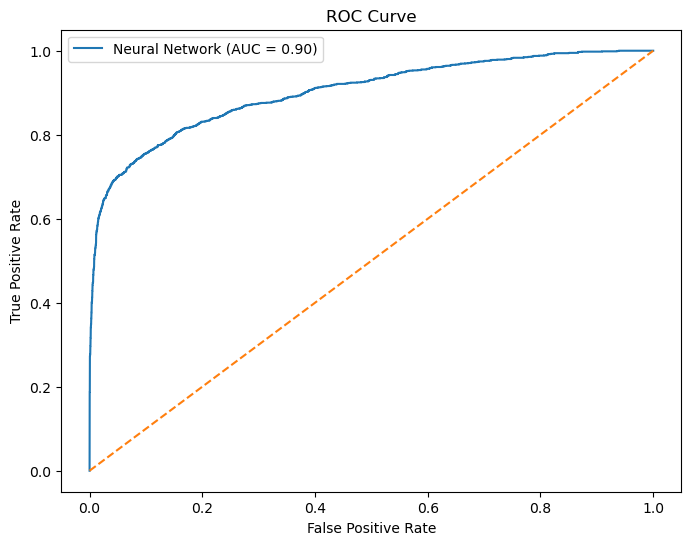

In [43]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt


input_layer = Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2]))

# CNN Layers first
x = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(64, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)

# Fully connected layers
x = Dense(64, activation='relu')(x)
x = Dropout(0.4)(x)

# LSTM Layers
# Since we flattened the input, we reshape it to add time steps before applying LSTM
x = Dense(64, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.4)(x)

# Output Layer
output_layer = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)

# Print performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate ROC-AUC
y_pred_proba = model.predict(X_test_cnn).ravel()
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
